> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_gini = pd.read_csv('gini.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
#visualize first five lines of df_co2
df_co2.head()
#oh la la what a mess

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [3]:
#check out df_co2 info
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 216 entries, country to 2014
dtypes: float64(215), object(1)
memory usage: 324.1+ KB


In [4]:
#visualize first five lines of df_co2
df_gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [5]:
#check out df_co2 info
#https://www.investopedia.com/terms/g/gini-index.asp
df_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2040
dtypes: float64(241), object(1)
memory usage: 368.8+ KB


In [6]:
#check length match of two dataframes
print(len(df_co2.index))
print(len(df_gini.index))

192
195


In [7]:
df_co2.index = df_co2.country
df_gini.index = df_gini.country

In [8]:
index_to_drop = [print(idx) for idx in enumerate(df_gini.index) if idx[1] not in df_co2.index]

(72, 'Holy See')
(113, 'Monaco')
(145, 'San Marino')


In [9]:
df_gini.iloc[[72,113,145]]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Holy See,Holy See,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Monaco,Monaco,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
San Marino,San Marino,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


In [10]:
df_gini.drop(df_gini.iloc[[72,113,145]].index, axis = 0, inplace = True)

In [11]:
df_gini.shape

(192, 242)

In [12]:
#check if df_gini and df_co2 have the same lenght
(df_gini.index == df_co2.index).all()

True

In [13]:
df_co2 = df_co2.iloc[:,-10:]

In [14]:
df_gini = df_gini.loc[:,[str(x) for x in range(2005,2015)]]

In [15]:
df_gini.rename(columns=lambda x: x + "_gini", inplace=True)

In [16]:
df_combined = df_gini.merge(df_co2, left_on='country', right_on='country', how='inner')

In [17]:
df_combined.head()

,2005_gini,2006_gini,2007_gini,2008_gini,2009_gini,2010_gini,2011_gini,2012_gini,2013_gini,2014_gini,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
Albania,30.7,30.4,30.2,30.0,29.7,29.5,29.3,29.1,29.0,29.0,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
Algeria,30.8,30.3,29.9,29.4,29.0,28.5,28.2,27.9,27.7,27.6,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
Angola,47.3,46.2,45.0,44.1,43.4,42.9,42.7,42.6,42.6,42.6,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
2005_gini    192 non-null float64
2006_gini    192 non-null float64
2007_gini    192 non-null float64
2008_gini    192 non-null float64
2009_gini    192 non-null float64
2010_gini    192 non-null float64
2011_gini    192 non-null float64
2012_gini    192 non-null float64
2013_gini    192 non-null float64
2014_gini    192 non-null float64
2005         190 non-null float64
2006         190 non-null float64
2007         191 non-null float64
2008         191 non-null float64
2009         191 non-null float64
2010         191 non-null float64
2011         191 non-null float64
2012         192 non-null float64
2013         192 non-null float64
2014         192 non-null float64
dtypes: float64(20)
memory usage: 31.5+ KB


In [26]:
[column for column in enumerate(df_combined.columns)]

[(0, '2005_gini'),
 (1, '2006_gini'),
 (2, '2007_gini'),
 (3, '2008_gini'),
 (4, '2009_gini'),
 (5, '2010_gini'),
 (6, '2011_gini'),
 (7, '2012_gini'),
 (8, '2013_gini'),
 (9, '2014_gini'),
 (10, '2005'),
 (11, '2006'),
 (12, '2007'),
 (13, '2008'),
 (14, '2009'),
 (15, '2010'),
 (16, '2011'),
 (17, '2012'),
 (18, '2013'),
 (19, '2014')]

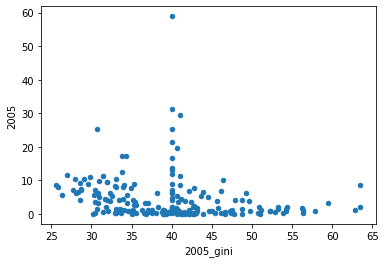

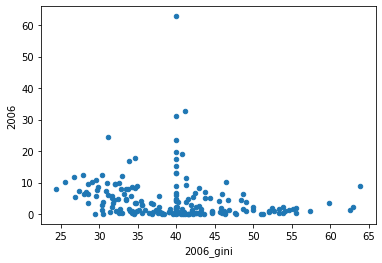

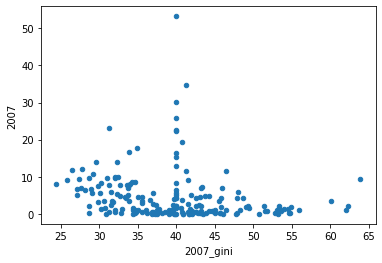

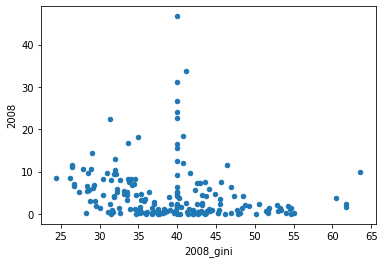

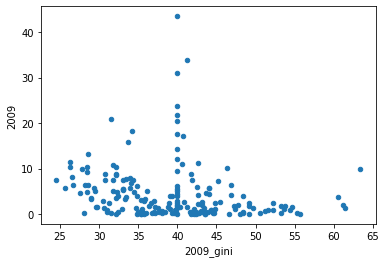

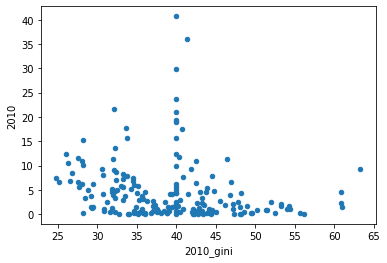

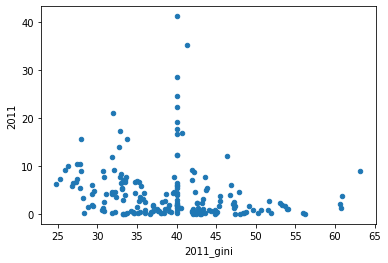

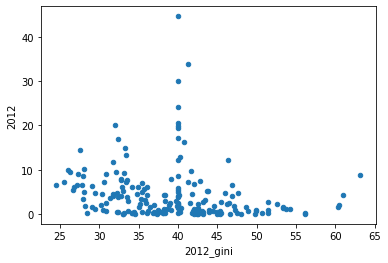

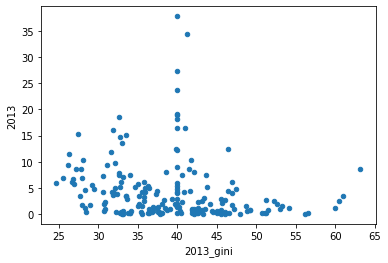

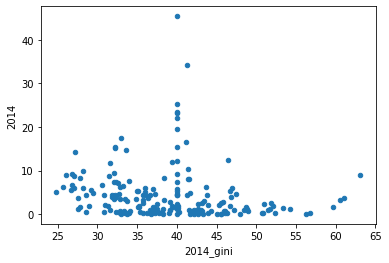

In [67]:
df_combined.plot(x='2005_gini', y='2005', kind='scatter')
df_combined.plot(x='2006_gini', y='2006', kind='scatter')
df_combined.plot(x='2007_gini', y='2007', kind='scatter')
df_combined.plot(x='2008_gini', y='2008', kind='scatter')
df_combined.plot(x='2009_gini', y='2009', kind='scatter')
df_combined.plot(x='2010_gini', y='2010', kind='scatter')
df_combined.plot(x='2011_gini', y='2011', kind='scatter')
df_combined.plot(x='2012_gini', y='2012', kind='scatter')
df_combined.plot(x='2013_gini', y='2013', kind='scatter')
df_combined.plot(x='2014_gini', y='2014', kind='scatter');

In [59]:
x = df_combined.loc['Uruguay', [str(x) for x in range(2005,2015)]]

In [60]:
y = df_combined.loc['Uruguay', [str(x) + '_gini' for x in range(2005,2015)]]

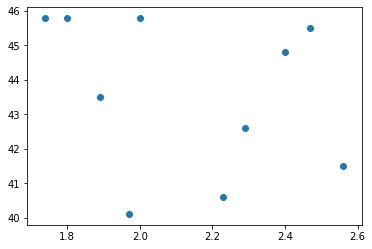

In [61]:
plt.scatter(x, y)
plt.show()

In [55]:
df_combined.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=192)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!